In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 #for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [3]:
data = pd.read_csv('data_2.csv')

In [4]:
data

,Unnamed: 0,from,subject,text,labels
0,2011,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",Gateway to GRE | BITS Embryo,Gateway to GRE The inevitable stepping stone ...,Campus Events
1,1693,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...","Release of Musings 2021 by KR Meera, the recip...",*Release of Musings 2021* Department of Human...,Campus Events
2,1756,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",Caption It - BITSians' Day,Greetings from *Student Alumni Relations Cell ...,Campus Events
3,1898,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",[SU By-Elections 2021-22] Call for Nominations,*SU BY-ELECTIONS 2021-22* *CALL FOR NOMINATIO...,Campus Events
4,2134,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",Grub signings on 3 March 2019,Punjabi Cultural Association is proud to prese...,Campus Events
...,...,...,...,...,...
995,331,Superset <notifications@joinsuperset.com>,[Tnpsuite] Samsung R&D Delhi | Summer Internsh...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",job/intern opportunities
996,228,Superset <notifications@email.joinsuperset.com>,BITS Placement Unit :: Open for application - ...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",job/intern opportunities
997,107,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",IPCD BITS Pilani | Semester Exchange Program w...,Greetings from IPCD! We are pleased to announc...,job/intern opportunities
998,138,Microsoft Aep <trainer@inversion.co.in>,Ayush Sharma Microsoft is inviting application...,# Hi Ayush Sharma As you must be here that Mic...,job/intern opportunities


In [5]:
# remove rows in which error occured in data extraction pipeline

data.drop( data.index[ data['subject' ] == '#ERROR!' ], inplace=True)



In [6]:
data

,Unnamed: 0,from,subject,text,labels
0,2011,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",Gateway to GRE | BITS Embryo,Gateway to GRE The inevitable stepping stone ...,Campus Events
1,1693,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...","Release of Musings 2021 by KR Meera, the recip...",*Release of Musings 2021* Department of Human...,Campus Events
2,1756,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",Caption It - BITSians' Day,Greetings from *Student Alumni Relations Cell ...,Campus Events
3,1898,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",[SU By-Elections 2021-22] Call for Nominations,*SU BY-ELECTIONS 2021-22* *CALL FOR NOMINATIO...,Campus Events
4,2134,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",Grub signings on 3 March 2019,Punjabi Cultural Association is proud to prese...,Campus Events
...,...,...,...,...,...
995,331,Superset <notifications@joinsuperset.com>,[Tnpsuite] Samsung R&D Delhi | Summer Internsh...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",job/intern opportunities
996,228,Superset <notifications@email.joinsuperset.com>,BITS Placement Unit :: Open for application - ...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",job/intern opportunities
997,107,"""Mail Admin @ Pilani Campus"" <mailadmin@pilani...",IPCD BITS Pilani | Semester Exchange Program w...,Greetings from IPCD! We are pleased to announc...,job/intern opportunities
998,138,Microsoft Aep <trainer@inversion.co.in>,Ayush Sharma Microsoft is inviting application...,# Hi Ayush Sharma As you must be here that Mic...,job/intern opportunities


In [7]:
# removing duplicates

data.drop_duplicates(subset ="text", keep = 'first', inplace = True)

In [8]:
#encoding from ordinal encoder -> 'from' feature

# label encoder is same as ordinal encoder, difference is just the input variable shape and the intent of the feature 

encoder = LabelEncoder()
data['from'] = encoder.fit_transform(data['from'])


Campus Events               198
job/intern opportunities    196
Operational                 189
Subjects                    181
Promotional                 180
Name: labels, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

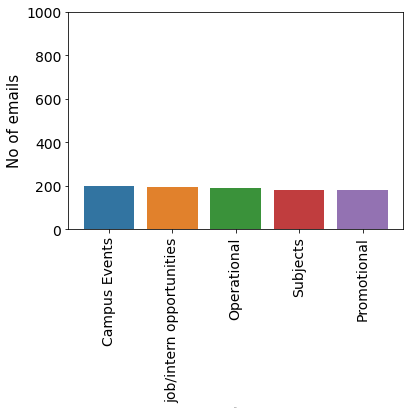

In [9]:
# class distribution
x=data['labels'].value_counts()
print(x)
# sns.barplot(x.index,x)


label_plot=sns.barplot(x.index , x , dodge=False)
# label_plot.get_legend().remove()
plt.setp(label_plot.get_xticklabels(), rotation=90)
plt.ylim(0,1000)
label_plot.tick_params(labelsize=14)
label_plot.set_ylabel("No of emails",fontsize=15)
label_plot.set_xlabel("Labels",fontsize=1)
plt.plot()

In [10]:
# checking missing values


data.isna().sum()

Unnamed: 0    0
from          0
subject       0
text          0
labels        0
dtype: int64

In [11]:
# deleting Nan values

data  = data.dropna()

In [12]:
# checking missing values


data.isna().sum()

Unnamed: 0    0
from          0
subject       0
text          0
labels        0
dtype: int64

In [13]:
data = data.reset_index()

data.drop(['index'] , axis = 1)

,Unnamed: 0,from,subject,text,labels
0,2011,13,Gateway to GRE | BITS Embryo,Gateway to GRE The inevitable stepping stone ...,Campus Events
1,1693,13,"Release of Musings 2021 by KR Meera, the recip...",*Release of Musings 2021* Department of Human...,Campus Events
2,1756,13,Caption It - BITSians' Day,Greetings from *Student Alumni Relations Cell ...,Campus Events
3,1898,13,[SU By-Elections 2021-22] Call for Nominations,*SU BY-ELECTIONS 2021-22* *CALL FOR NOMINATIO...,Campus Events
4,2134,13,Grub signings on 3 March 2019,Punjabi Cultural Association is proud to prese...,Campus Events
...,...,...,...,...,...
939,331,68,[Tnpsuite] Samsung R&D Delhi | Summer Internsh...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",job/intern opportunities
940,228,67,BITS Placement Unit :: Open for application - ...,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S...",job/intern opportunities
941,107,13,IPCD BITS Pilani | Semester Exchange Program w...,Greetings from IPCD! We are pleased to announc...,job/intern opportunities
942,138,55,Ayush Sharma Microsoft is inviting application...,# Hi Ayush Sharma As you must be here that Mic...,job/intern opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

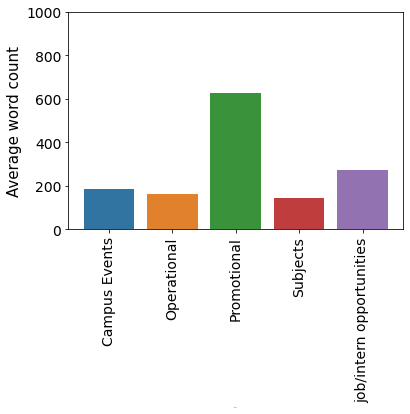

In [14]:
# adding a feature of word count in dataset, and plotting its average grouped by label

data['word_count'] = data['text'].apply( lambda y: len(str(y).split()) )

x  = data.groupby('labels')['word_count'].mean()

label_plot=sns.barplot(x.index , x , dodge=False)
# label_plot.get_legend().remove()
plt.setp(label_plot.get_xticklabels(), rotation=90)
plt.ylim(0,1000)
label_plot.tick_params(labelsize=14)
label_plot.set_ylabel("Average word count",fontsize=15)
label_plot.set_xlabel("Labels",fontsize=1)
plt.plot()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

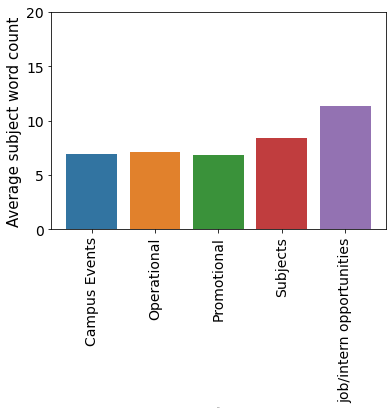

In [15]:
# adding a feature of subject word count in dataset, and plotting its average grouped by label

data['subject_word_count'] = data['subject'].apply(lambda y: len(str(y).split()))

x  = data.groupby('labels')['subject_word_count'].mean()

label_plot=sns.barplot(x.index , x , dodge=False)
# label_plot.get_legend().remove()
plt.setp(label_plot.get_xticklabels(), rotation=90)
plt.ylim(0,20)
label_plot.tick_params(labelsize=14)
label_plot.set_ylabel("Average subject word count",fontsize=15)
label_plot.set_xlabel("Labels",fontsize=1)
plt.plot()


In [16]:
# encoding the target label

label_encoder = LabelEncoder()
data['labels'] = label_encoder.fit_transform(data['labels'])

In [17]:
label_encoder_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encoder_name_mapping)

{'Campus Events': 0, 'Operational': 1, 'Promotional': 2, 'Subjects': 3, 'job/intern opportunities': 4}


In [18]:
# removing stopwords

def remove_stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)

In [19]:
# function for standard preprocessing of text : strip text; remove punctuations,links,numbers; lowercasing
def intial_preprocess(text):
    
    text=text.strip()  
    text = text.lower() 
    
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text=re.compile('<.*?>').sub('', text) 


    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

In [20]:
#Performing standard lemmatization

lemmatizer_obj = WordNetLemmatizer()
 

def get_wordnet_pos(tag):
    '''
    function to map NTLK position tags
    '''
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    str_list = [lemmatizer_obj.lemmatize(pos_tag[0], get_wordnet_pos(pos_tag[1])) for idx, pos_tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(str_list)


In [21]:
words = set(nltk.corpus.words.words())

def remove_non_english(string):

  return " ".join(w for w in nltk.wordpunct_tokenize(string) if w.lower() in words or not w.isalpha())
  

In [22]:
#using the preprocessing functions in our dataframe
data['text'] = data['text'].apply(lambda x: lemmatizer( remove_non_english(remove_stopword(intial_preprocess(x)))) )

data['subject'] = data['subject'].apply(lambda x: lemmatizer( remove_non_english(remove_stopword(intial_preprocess(str(x) )))) )



In [23]:
#limiting number of words in subject and text
MAX_SIZE_SUBJECT = 20
MAX_SIZE_BODY = 500

data['text'] = data['text'].apply(lambda x: ' '.join(x.split(maxsplit= MAX_SIZE_BODY )[:MAX_SIZE_BODY]))

data['subject'] = data['subject'].apply(lambda x: ' '.join(x.split(maxsplit= MAX_SIZE_SUBJECT )[: MAX_SIZE_SUBJECT ]))


In [24]:
#concatenating processed subject and email text by joimning them with a space
data['body'] = data['subject'] + ' ' + data['text'] 

1 -gram
(755, 7101)
(755,)
              precision    recall  f1-score   support

           0       0.59      0.97      0.73        30
           1       1.00      0.77      0.87        47
           2       0.90      0.88      0.89        32
           3       0.97      0.93      0.95        40
           4       0.80      0.70      0.75        40

    accuracy                           0.84       189
   macro avg       0.85      0.85      0.84       189
weighted avg       0.87      0.84      0.84       189

################
2 -gram
(755, 62007)
(755,)
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        30
           1       1.00      0.83      0.91        47
           2       1.00      0.59      0.75        32
           3       0.65      1.00      0.78        40
           4       0.82      0.80      0.81        40

    accuracy                           0.81       189
   macro avg       0.85      0.80      0.80       189
weigh

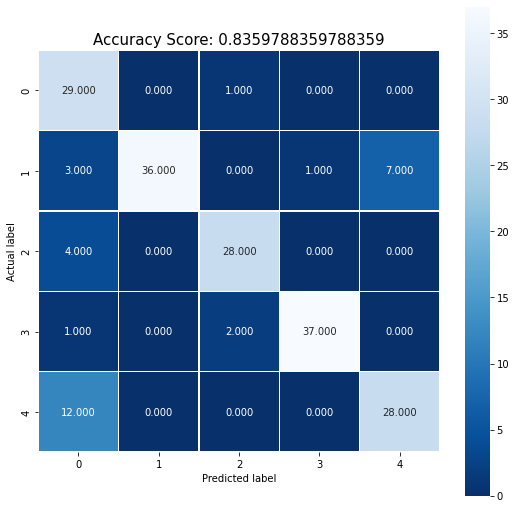

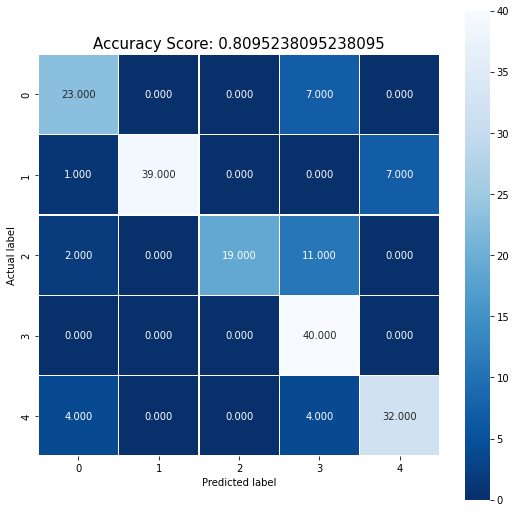

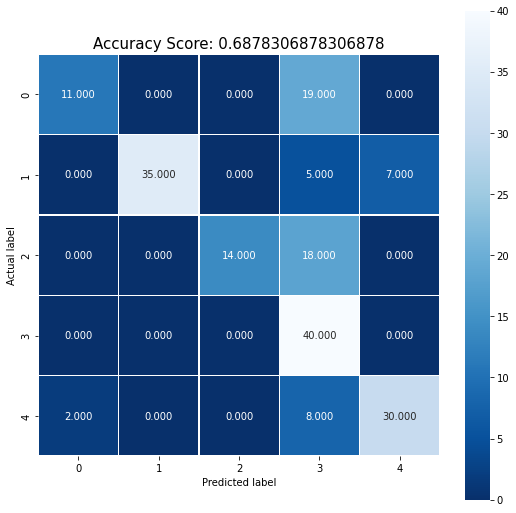

In [25]:
clf = MultinomialNB()

for i in [1,2,3]:

  print(i,"-gram")
  
  x_value_text = CountVectorizer(ngram_range=(i,i)).fit_transform(data['body'])

  
  xtrain, xtest, ytrain, ytest = train_test_split( x_value_text , data['labels'].values , test_size=0.20, random_state=0)

  print(xtrain.shape)
  print(ytrain.shape)

  classifier = clf.fit( xtrain, ytrain)
  
  pred = classifier.predict(xtest)
  print(classification_report(ytest, pred))
  # print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
  # print("Accuracy: \n", accuracy_score(ytest, pred))
  
  score = clf.score(xtest, ytest)
  cm = metrics.confusion_matrix(ytest, pred)

  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15)

  print('#' * 16 )



1 -gram
(755, 7101)
(755,)
              precision    recall  f1-score   support

           0       0.67      0.93      0.78        30
           1       0.98      0.91      0.95        47
           2       1.00      0.84      0.92        32
           3       0.93      0.95      0.94        40
           4       0.91      0.80      0.85        40

    accuracy                           0.89       189
   macro avg       0.90      0.89      0.89       189
weighted avg       0.91      0.89      0.89       189

################
2 -gram
(755, 62007)
(755,)
              precision    recall  f1-score   support

           0       0.67      0.47      0.55        30
           1       0.98      0.96      0.97        47
           2       1.00      0.84      0.92        32
           3       0.62      1.00      0.77        40
           4       1.00      0.78      0.87        40

    accuracy                           0.83       189
   macro avg       0.85      0.81      0.81       189
weigh

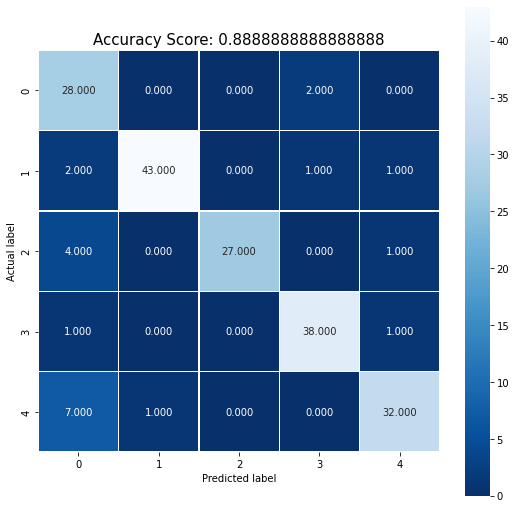

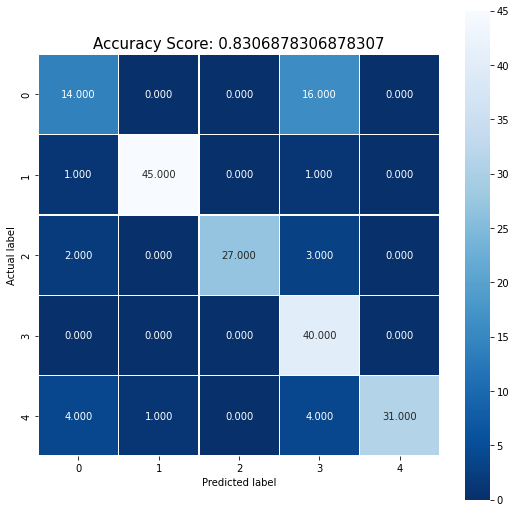

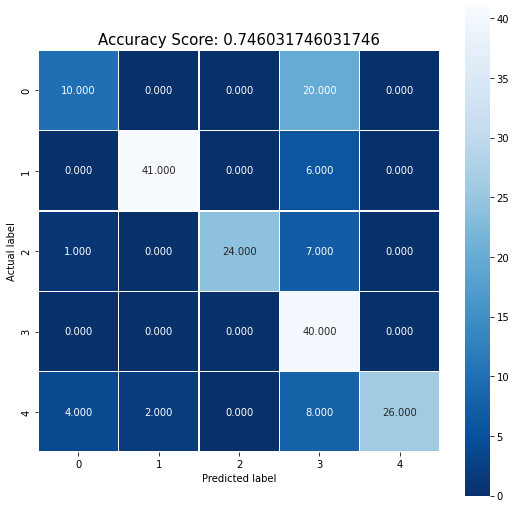

In [26]:

clf = svm.SVC(kernel='linear')
for i in [1,2,3]:

  print(i,"-gram")
  
  x_value_text = CountVectorizer(ngram_range=(i,i)).fit_transform(data['body'])

  
  xtrain, xtest, ytrain, ytest = train_test_split( x_value_text , data['labels'].values , test_size=0.20, random_state=0)

  print(xtrain.shape)
  print(ytrain.shape)

  classifier = clf.fit( xtrain, ytrain)
  
  pred = classifier.predict(xtest)
  print(classification_report(ytest, pred))
  # print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
  # print("Accuracy: \n", accuracy_score(ytest, pred))
  
  score = clf.score(xtest, ytest)
  cm = metrics.confusion_matrix(ytest, pred)

  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15)

  print('#' * 16 )

1 -gram
(755, 7101)
(755,)
              precision    recall  f1-score   support

           0       0.72      0.97      0.83        30
           1       0.98      0.94      0.96        47
           2       1.00      0.88      0.93        32
           3       0.97      0.95      0.96        40
           4       0.89      0.82      0.86        40

    accuracy                           0.91       189
   macro avg       0.91      0.91      0.91       189
weighted avg       0.92      0.91      0.91       189

################
2 -gram
(755, 62007)
(755,)
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        30
           1       0.98      0.96      0.97        47
           2       1.00      0.88      0.93        32
           3       0.98      1.00      0.99        40
           4       1.00      0.82      0.90        40

    accuracy                           0.93       189
   macro avg       0.93      0.92      0.92       189
weigh

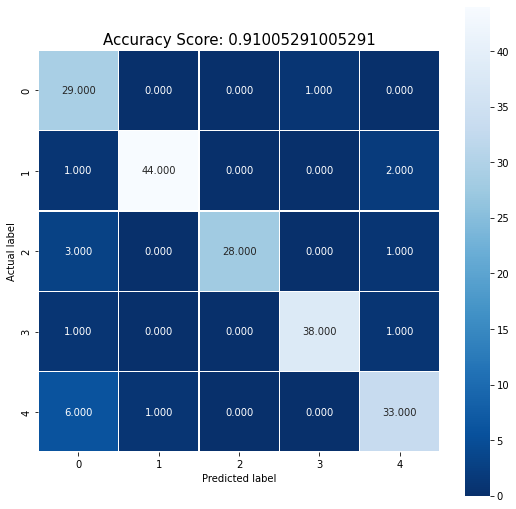

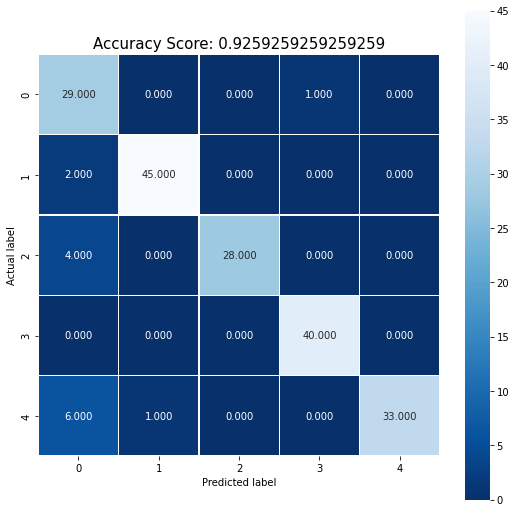

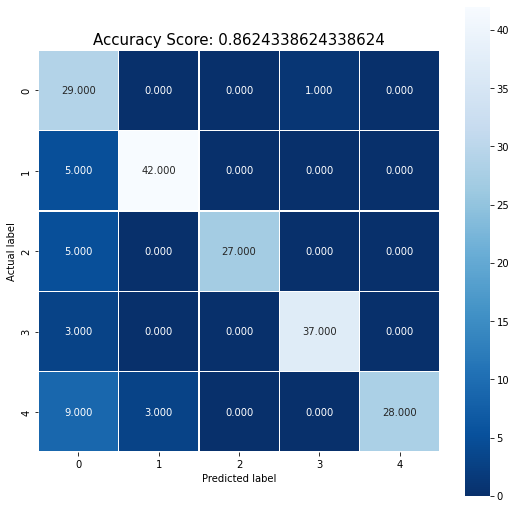

In [27]:
clf = LogisticRegression(max_iter=12000)

for i in [1,2,3]:

  print(i,"-gram")
  
  x_value_text = CountVectorizer(ngram_range=(i,i)).fit_transform(data['body'])
  
  xtrain, xtest, ytrain, ytest = train_test_split( x_value_text , data['labels'].values , test_size=0.20, random_state=0)

  print(xtrain.shape)
  print(ytrain.shape)

  classifier = clf.fit( xtrain, ytrain)
  
  pred = classifier.predict(xtest)
  print(classification_report(ytest, pred))
  # print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
  # print("Accuracy: \n", accuracy_score(ytest, pred))
  
  score = clf.score(xtest, ytest)
  cm = metrics.confusion_matrix(ytest, pred)

  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15)

  print('#' * 16 )


1 -gram
(755, 7101)
(755,)
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        30
           1       0.88      0.98      0.93        47
           2       0.93      0.88      0.90        32
           3       0.93      0.93      0.93        40
           4       0.91      0.75      0.82        40

    accuracy                           0.88       189
   macro avg       0.88      0.87      0.87       189
weighted avg       0.88      0.88      0.88       189

################
2 -gram
(755, 62007)
(755,)
              precision    recall  f1-score   support

           0       0.70      0.63      0.67        30
           1       1.00      0.96      0.98        47
           2       0.64      0.91      0.75        32
           3       0.97      0.85      0.91        40
           4       0.95      0.88      0.91        40

    accuracy                           0.86       189
   macro avg       0.85      0.84      0.84       189
weigh

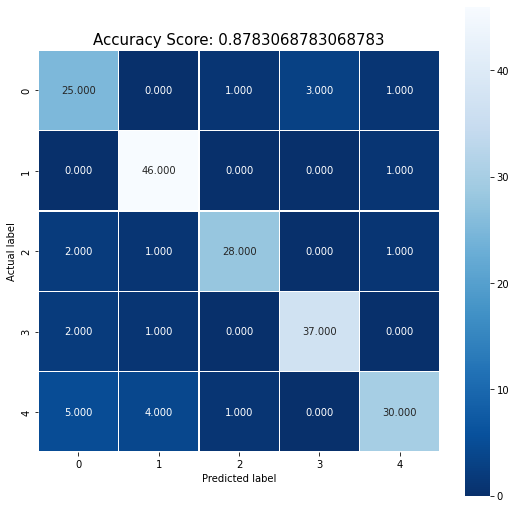

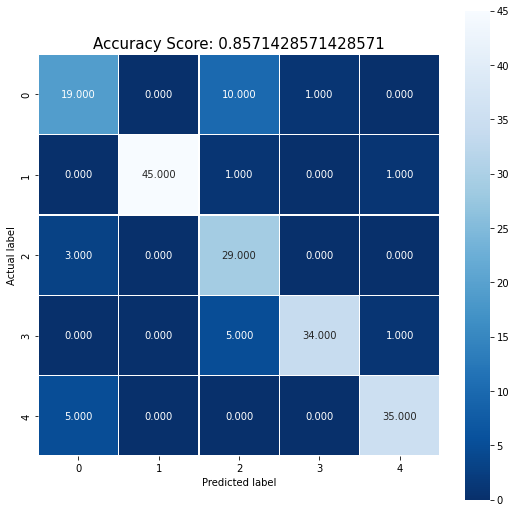

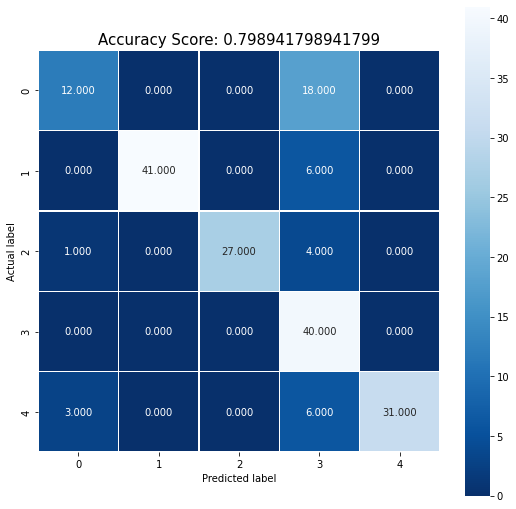

In [31]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=30)
for i in [1,2,3]:

  print(i,"-gram")
  
  x_value_text = CountVectorizer(ngram_range=(i,i)).fit_transform(data['body'])
  xtrain, xtest, ytrain, ytest = train_test_split( x_value_text , data['labels'].values , test_size=0.20, random_state=0)




  clf = DecisionTreeClassifier(criterion='entropy', splitter='random',random_state=30)

  

  print(xtrain.shape)
  print(ytrain.shape)

  classifier = clf.fit( xtrain.toarray(), ytrain)
  
  pred = classifier.predict(xtest)
  print(classification_report(ytest, pred))
  # print("Confusion Matrix: \n", confusion_matrix(ytest, pred))
  # print("Accuracy: \n", accuracy_score(ytest, pred))
  
  score = clf.score(xtest, ytest)
  cm = metrics.confusion_matrix(ytest, pred)

  plt.figure(figsize=(9,9))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
  plt.ylabel('Actual label');
  plt.xlabel('Predicted label');
  all_sample_title = 'Accuracy Score: {0}'.format(score)
  plt.title(all_sample_title, size = 15)

  print('#' * 16 )